In [ ]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler

def load_data(file_path):
    data = pd.read_csv(file_path)
    data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values
    data['Prev Close'] = data['Close'].shift(1)
    data.dropna(inplace=True)

    X = data[['Open', 'High', 'Low', 'Prev Close', 'Volume']]
    y = data['Close']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

    return X_tensor, y_tensor

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_data = TensorDataset(X_train, y_train)
    test_data = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=64)

    model = nn.Linear(5, 1)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    epochs = 100
    for epoch in range(epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    model.eval()
    total_loss = 0
    all_predictions = []
    all_actuals = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            all_predictions.extend(outputs.flatten().numpy())
            all_actuals.extend(labels.flatten().numpy())
            loss = criterion(outputs, labels)
            total_loss += loss.item()

    mse = total_loss / len(test_loader)
    rmse = np.sqrt(mse)
    return rmse, all_actuals, all_predictions

def plot_time_series(actuals, predictions, title):
    plt.figure(figsize=(15, 7))
    plt.plot(actuals, label='Actual Prices', color='blue')
    plt.plot(predictions, label='Predicted Prices', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Data Points')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

Mounted at /content/drive
aadr.us.txt RMSE: 0.2129


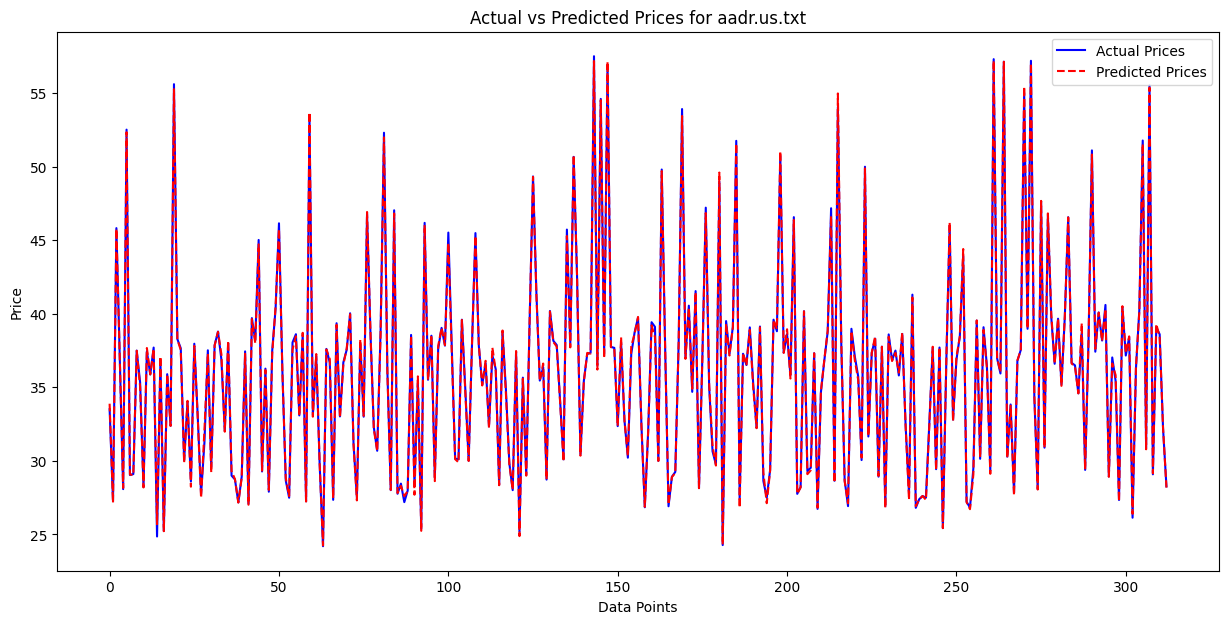

aaxj.us.txt RMSE: 0.4301


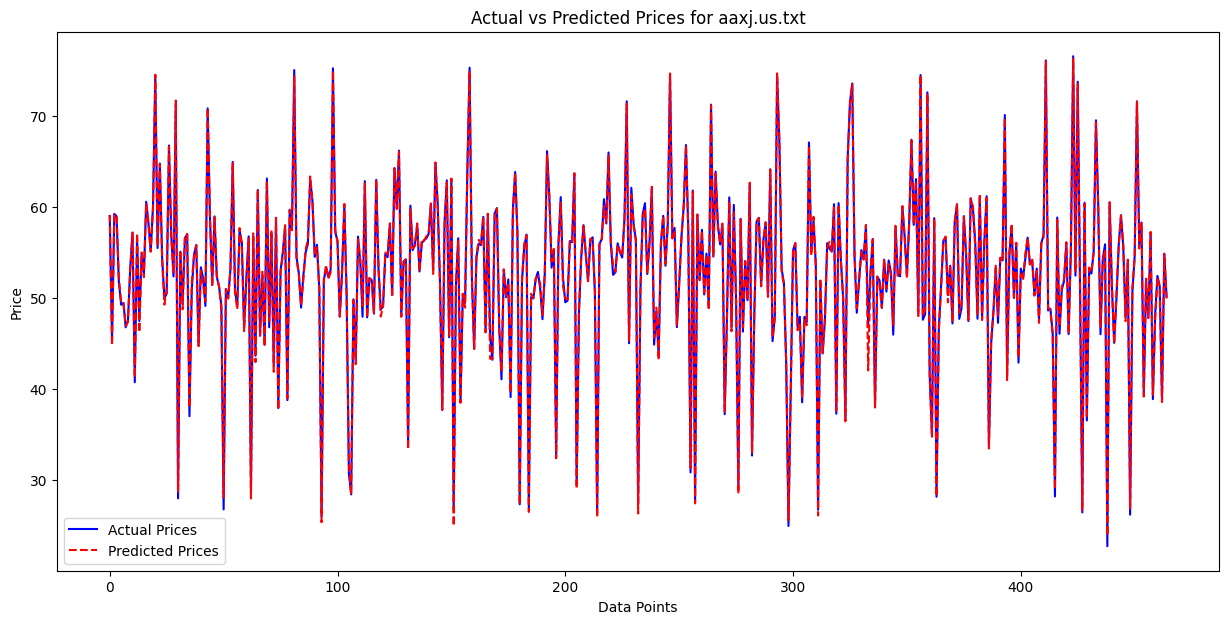

acim.us.txt RMSE: 0.3738


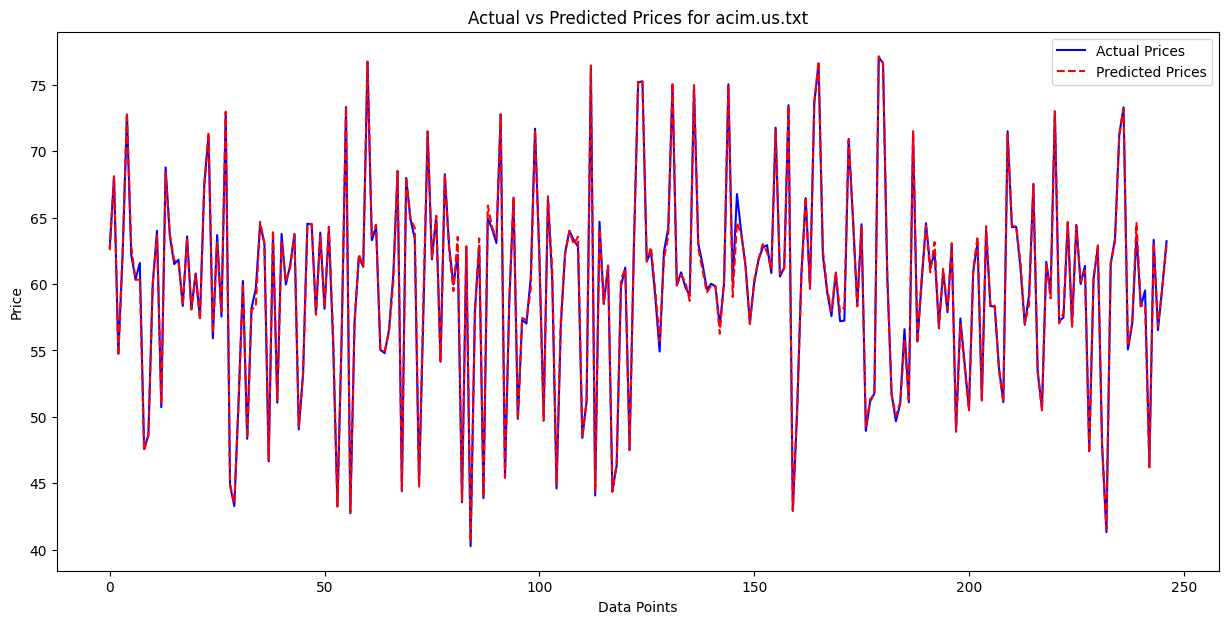

actx.us.txt RMSE: 0.0873


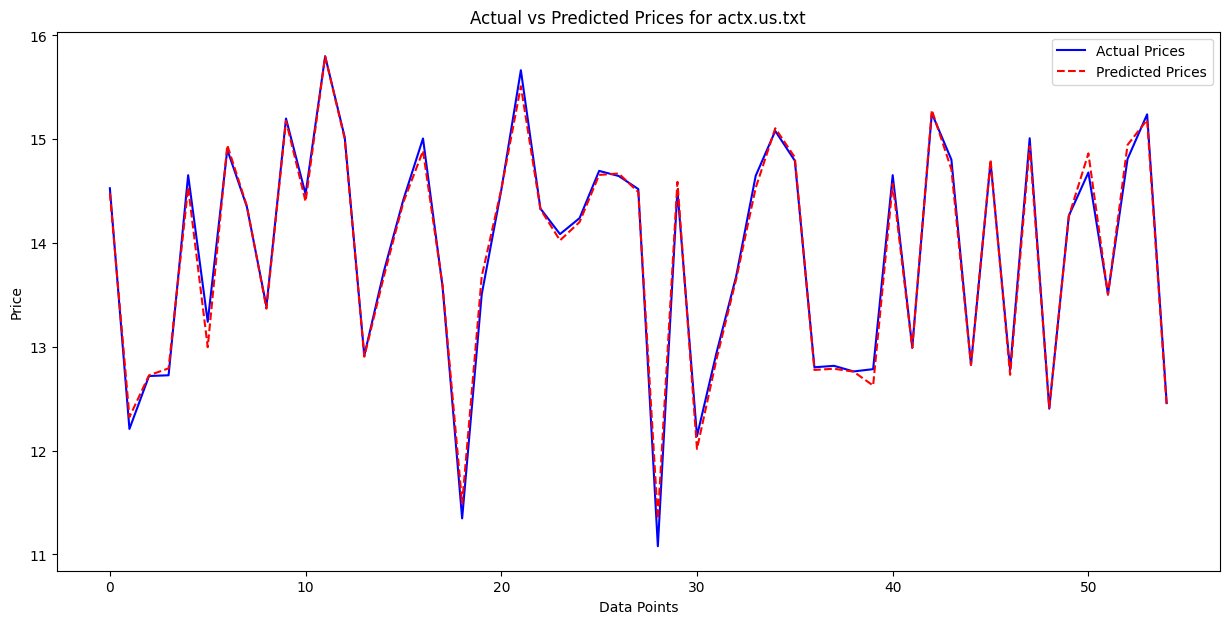

acwf.us.txt RMSE: 2.4083


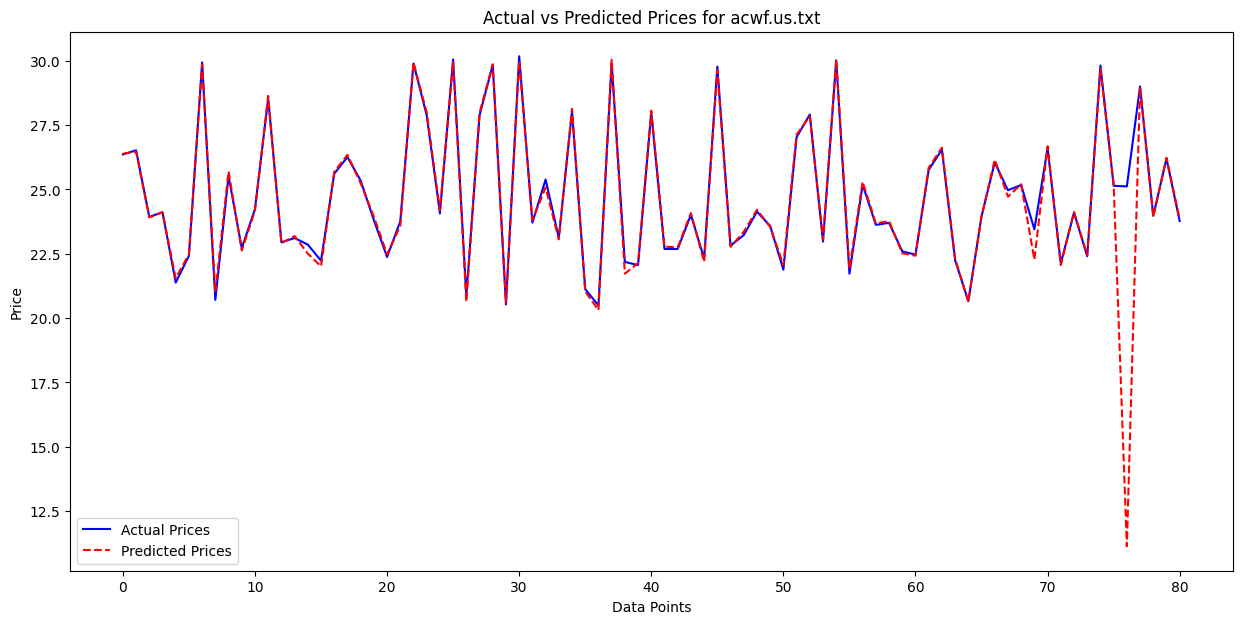

acwi.us.txt RMSE: 0.2763


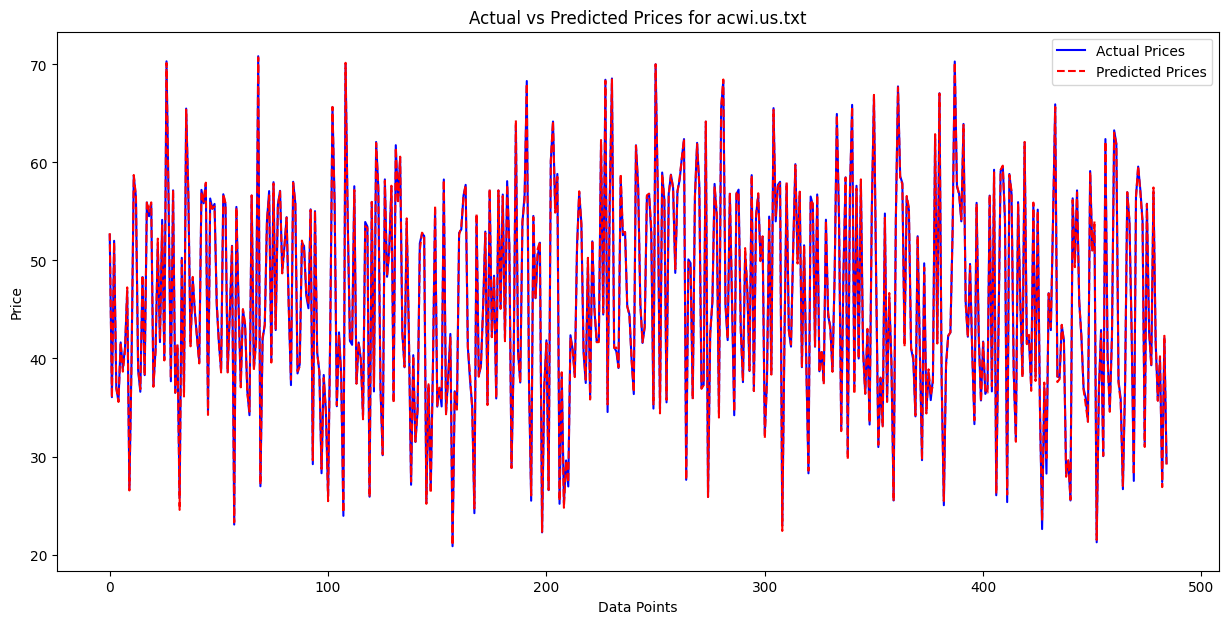

acwv.us.txt RMSE: 0.2278


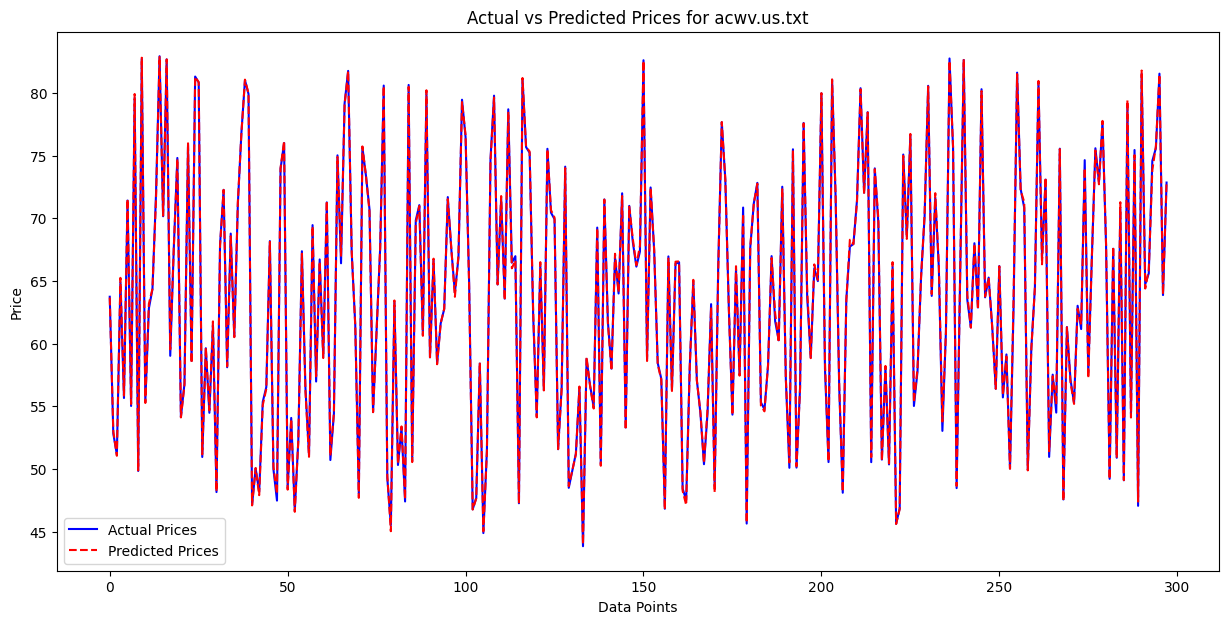

acwx.us.txt RMSE: 0.2619


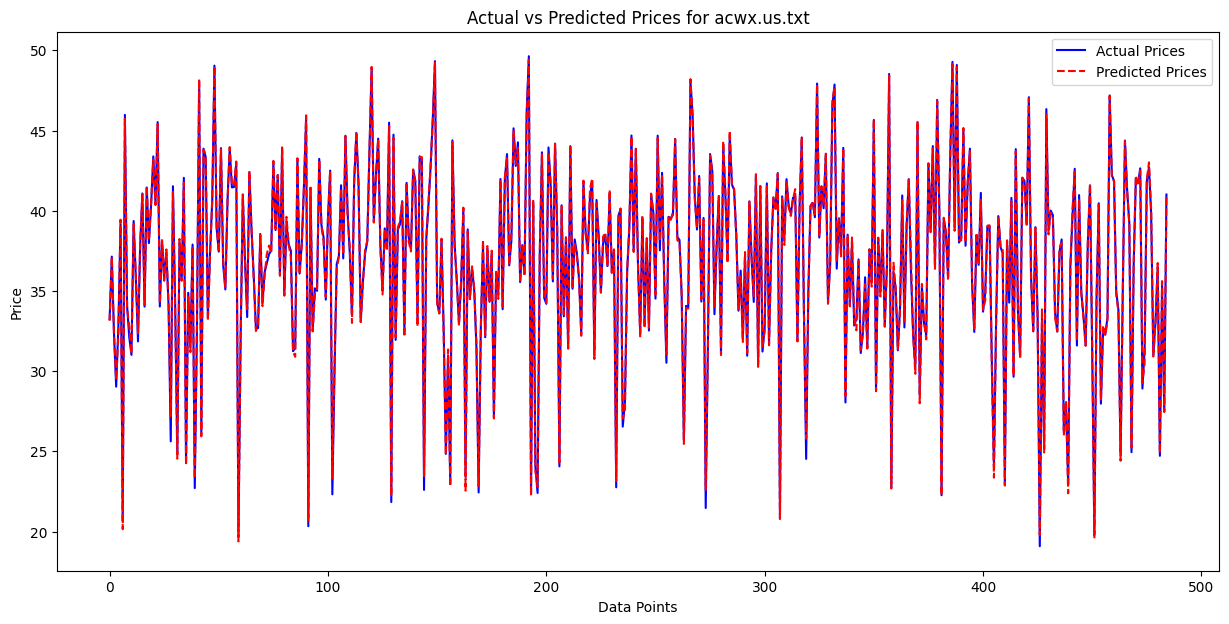

adra.us.txt RMSE: 0.2416


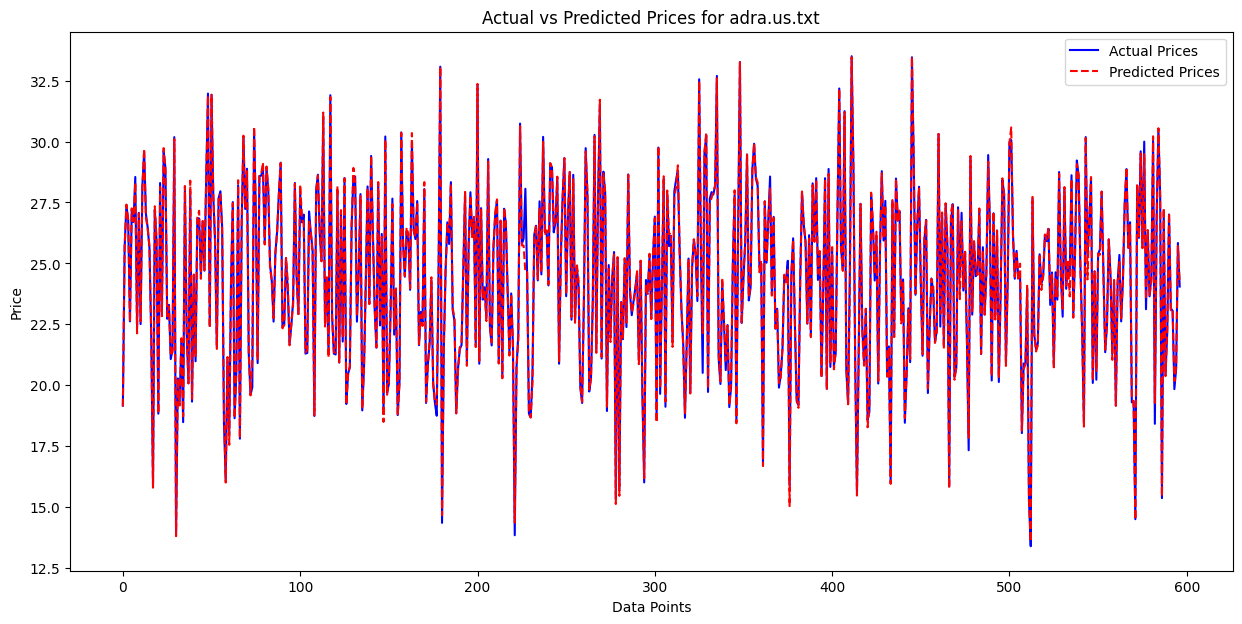

adrd.us.txt RMSE: 0.1491


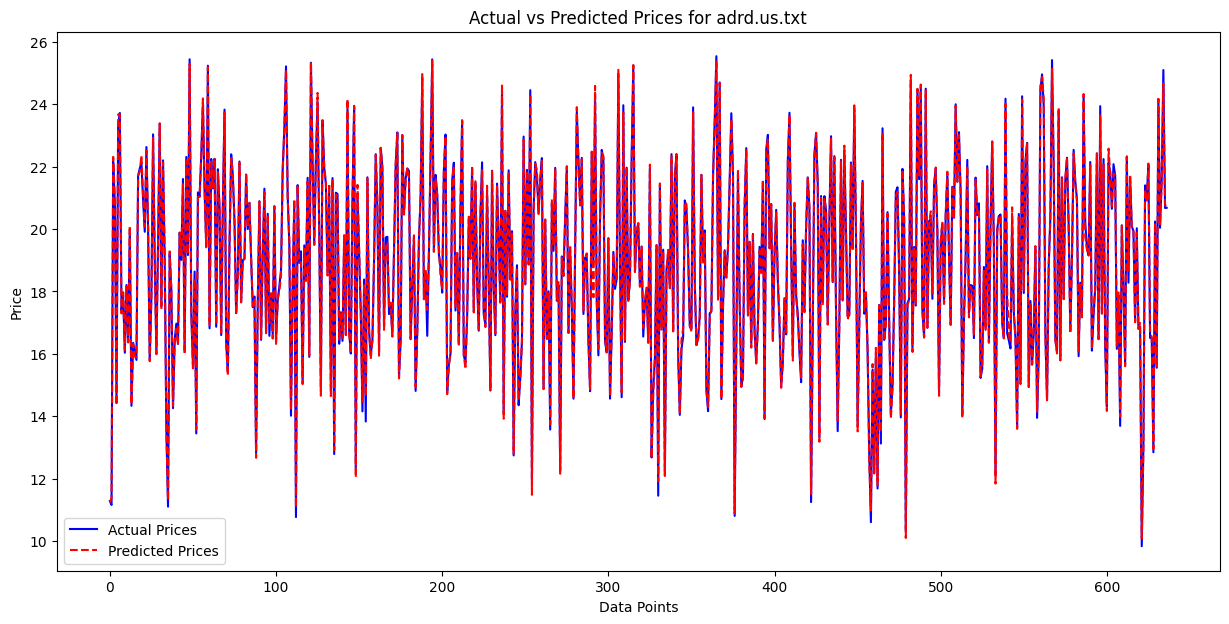

Average RMSE across all stocks: 0.46690264092659894


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

base_path = '/content/drive/My Drive/Colab Notebooks/'
files = ['aadr.us.txt', 'aaxj.us.txt', 'acim.us.txt', 'actx.us.txt', 'acwf.us.txt', 'acwi.us.txt', 'acwv.us.txt', 'acwx.us.txt', 'adra.us.txt', 'adrd.us.txt']
rmses = []

for filename in files:
    file_path = os.path.join(base_path, filename)
    X, y = load_data(file_path)
    rmse, actuals, predictions = train_and_evaluate(X, y)
    rmses.append(rmse)
    print(f'{filename} RMSE: {rmse:.4f}')
    plot_time_series(actuals, predictions, title=f'Actual vs Predicted Prices for {filename}')

print('Average RMSE across all stocks:', np.mean(rmses))